<a href="https://colab.research.google.com/github/fergarcat/eda-usa-income/blob/main/EDA_USA_Urban_Rural_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Income and Urban VS Rural For Each County in USA. Exploratory Data Analysis**

#**Dataset Explanation**


###**Overview**
This dataset provides insights into the population distribution and income levels across counties in the United States, with a classification of counties as either "Urban" or "Rural." The data was sourced from the U.S. Census Bureau's 2023 American Community Survey (ACS).

###**Methodology**
####Data Source:
>PI Endpoint: U.S. Census Bureau ACS 2023 API

>Variables:
>B01003_001E: Total population.
>B19013_001E: Median household income.
####Processing:

>Counties were classified as "Urban" if their population was above the median population; otherwise, they were classified as "Rural."
FIPS codes were generated by concatenating State and County FIPS codes.
####Columns:

>**County**: County name.

>**State**: State name.

>**FIPS**: Combined state and county FIPS code.

>**State FIPS Code**: State's Federal Information Processing Standard code.

>**County FIPS Code**: County's FIPS code.

>**Total Population**: Total population of the county.

>**Median Household Income**: Median household income for the county.

>**Urban-Rural**: Classification based on population (Urban or Rural).
###**Usage**
This dataset can be used for:

>Urban vs. rural demographic and economic analysis.

>Income distribution studies.

>Data visualization and mapping using FIPS codes.
###**License**
This dataset is provided under the public domain. Proper attribution to the U.S. Census Bureau is appreciated.

#Load Kaggle API Key
Check next documentation to get one:
- https://www.kaggle.com/docs/api
- https://github.com/Kaggle/kaggle-api

In [1]:
import os
import shutil
#Upload file
from google.colab import files
files.upload()

# Make kaggle folder
os.makedirs("/root/.config/kaggle", exist_ok=True)

# Move uploaded file
shutil.move("kaggle.json", "/root/.config/kaggle/kaggle.json")

# Grant permissions
os.chmod("/root/.config/kaggle/kaggle.json", 600)

# Check if file exists
print(os.path.exists("/root/.config/kaggle/kaggle.json"))  # Esto debe imprimir True



Saving kaggle.json to kaggle.json
True


#**Libraries to import**

In [2]:
%%capture
!pip install kaggle
!pip install geopandas
import os
import geopandas as gpd
from shapely.geometry import Point
import kagglehub
import pandas as pd
import kaggle
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


#**DATASOURCE**

#**Download and transform kaggle file**

In [51]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
kaggle_source = 'ahmedmohamed2003/income-urban-vs-rural-for-each-county'
file_folder = '/content/kaggle_files'
file_name = os.listdir(file_folder)[0]  # Works for just the one file
file_path = os.path.join(file_folder, file_name)
api = KaggleApi()
api.authenticate()
kaggle.api.dataset_download_files(kaggle_source, path=file_folder, unzip=True)

df = pd.read_csv(file_path)

Dataset URL: https://www.kaggle.com/datasets/ahmedmohamed2003/income-urban-vs-rural-for-each-county


#**Data Analysis**
## Preview
Using info, describe and head methons I make a first approach to the data.

  - County: county name
  - State: state name
  - FIPS
  - State FIPS Code
  - County FIPS Code
  - Total Population
  - Median Household Income
  - Urban-Rural: states the nature of  the county


In [52]:
df.describe()

,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income
count,3222.000000,3222.000000,3222.000000,3.222000e+03,3.222000e+03
mean,31377.890441,31.274674,103.216325,1.041721e+05,-3.488154e+05
std,16299.548258,16.285065,106.560811,3.296689e+05,1.660872e+07
min,1001.000000,1.000000,1.000000,4.300000e+01,-6.666667e+08
25%,19029.500000,19.000000,35.000000,1.098550e+04,5.410725e+04
50%,30022.000000,30.000000,79.000000,2.596700e+04,6.314950e+04
75%,46104.500000,46.000000,133.000000,6.752625e+04,7.319900e+04
max,72153.000000,72.000000,840.000000,9.848406e+06,1.787070e+05


In [53]:
df['Median Household Income'] = df['Median Household Income'].astype(float)
df['Total Population'] = df['Total Population'].astype(float)

##Negative Values
I find negative values in the Household Income column, so I'm filling in with the median of the set.

In [54]:
df[df['Median Household Income'] < 0]

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
1753,Esmeralda County,Nevada,32009,32,9,962.0,-666666666.0,Rural
2655,Kenedy County,Texas,48261,48,261,52.0,-666666666.0,Rural


In [55]:
#Replace negative values with median
median_income = df.loc[df['Median Household Income'] != -666666666, 'Median Household Income'].median()
df.loc[df['Median Household Income'] < 0, 'Median Household Income'] = median_income

## Check for null values
As seen below, no null values are present in the dataset

In [56]:
df.isnull().sum()

,0
County,0
State,0
FIPS,0
State FIPS Code,0
County FIPS Code,0
Total Population,0
Median Household Income,0
Urban-Rural,0


##Outliers
We find population and household income outliers. As far as it seems, they are expected values according to reality.

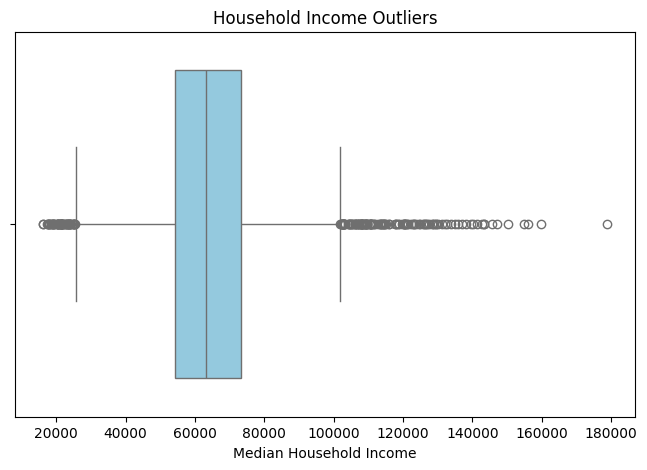

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Median Household Income'], color='skyblue')

plt.xlabel('Median Household Income')
plt.title('Household Income Outliers')
plt.show()


In [64]:
df.sort_values(by='Median Household Income', ascending=False).head(5)

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
2874,Loudoun County,Virginia,51107,51,107,427082.0,178707.0,Urban
229,Santa Clara County,California,6085,6,85,1903297.0,159674.0,Urban
227,San Mateo County,California,6081,6,81,745100.0,156000.0,Urban
2927,Falls Church city,Virginia,51610,51,610,14593.0,154734.0,Rural
2850,Fairfax County,Virginia,51059,51,59,1144474.0,150113.0,Urban


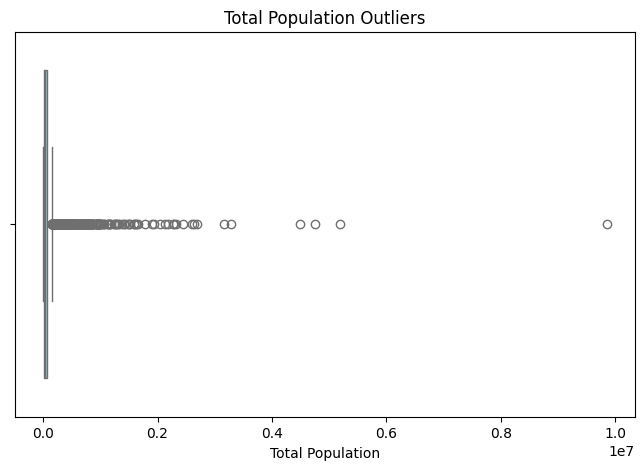

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total Population'], color='skyblue')

plt.xlabel('Total Population')
plt.title('Total Population Outliers')
plt.show()


In [63]:
df.sort_values(by='Total Population', ascending=False).head(5)

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
205,Los Angeles County,California,6037,6,37,9848406.0,87760.0,Urban
612,Cook County,Illinois,17031,17,31,5185812.0,81797.0,Urban
2625,Harris County,Texas,48201,48,201,4758579.0,73104.0,Urban
104,Maricopa County,Arizona,4013,4,13,4491987.0,85518.0,Urban
223,San Diego County,California,6073,6,73,3282782.0,102285.0,Urban


##Charts


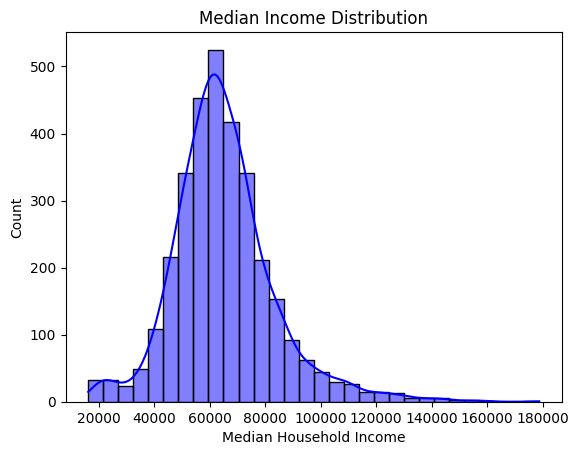

In [153]:
# @title Median Income Frequence Histogram and Poligon
sns.histplot(df['Median Household Income'], kde=True, color='blue', bins=30)
plt.title('Median Income Distribution')
plt.show()

<Figure size 1800x1500 with 0 Axes>

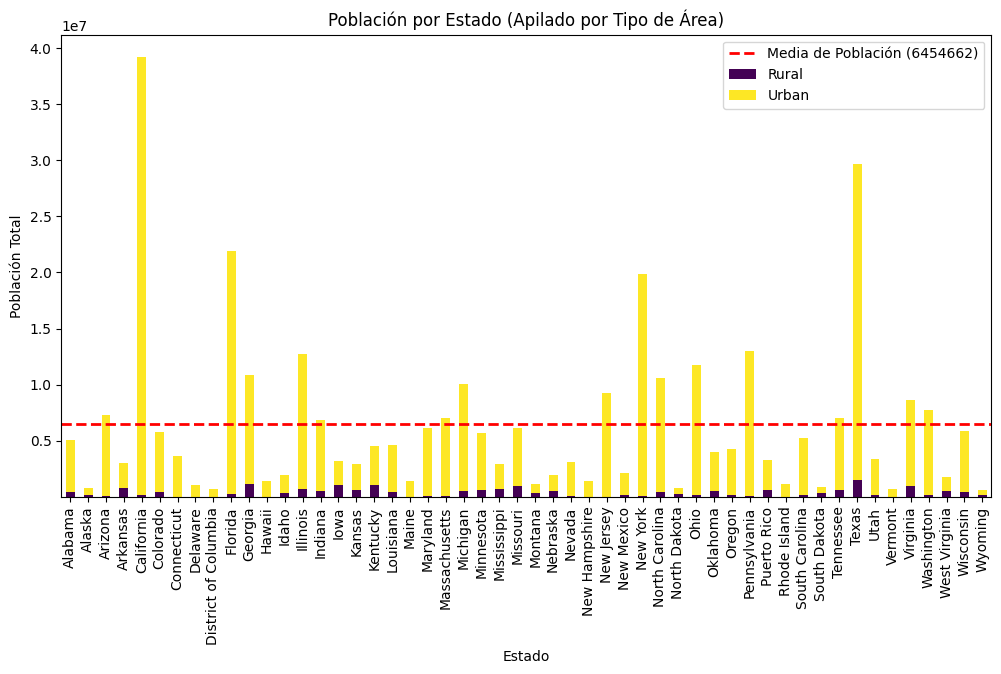

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los datos por 'State' y 'Urban-Rural', y sumar la población total
df_grouped = df.groupby(['State', 'Urban-Rural'])['Total Population'].sum().unstack()

# Calcular la media de la población total por estado
mean_population = df_grouped.sum(axis=1).mean()
plt.figure(figsize=(18, 15))
# Crear el gráfico de barras apiladas
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Añadir la línea de la media
ax.axhline(mean_population, color='red', linestyle='--', linewidth=2, label=f'Media de Población ({mean_population:.0f})')

# Configuración de etiquetas y título
plt.title('Población por Estado (Apilado por Tipo de Área)')
plt.xlabel('Estado')
plt.ylabel('Población Total')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


<ipython-input-166-a4f392d994d4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Median Household Income', data=df, palette='winter')


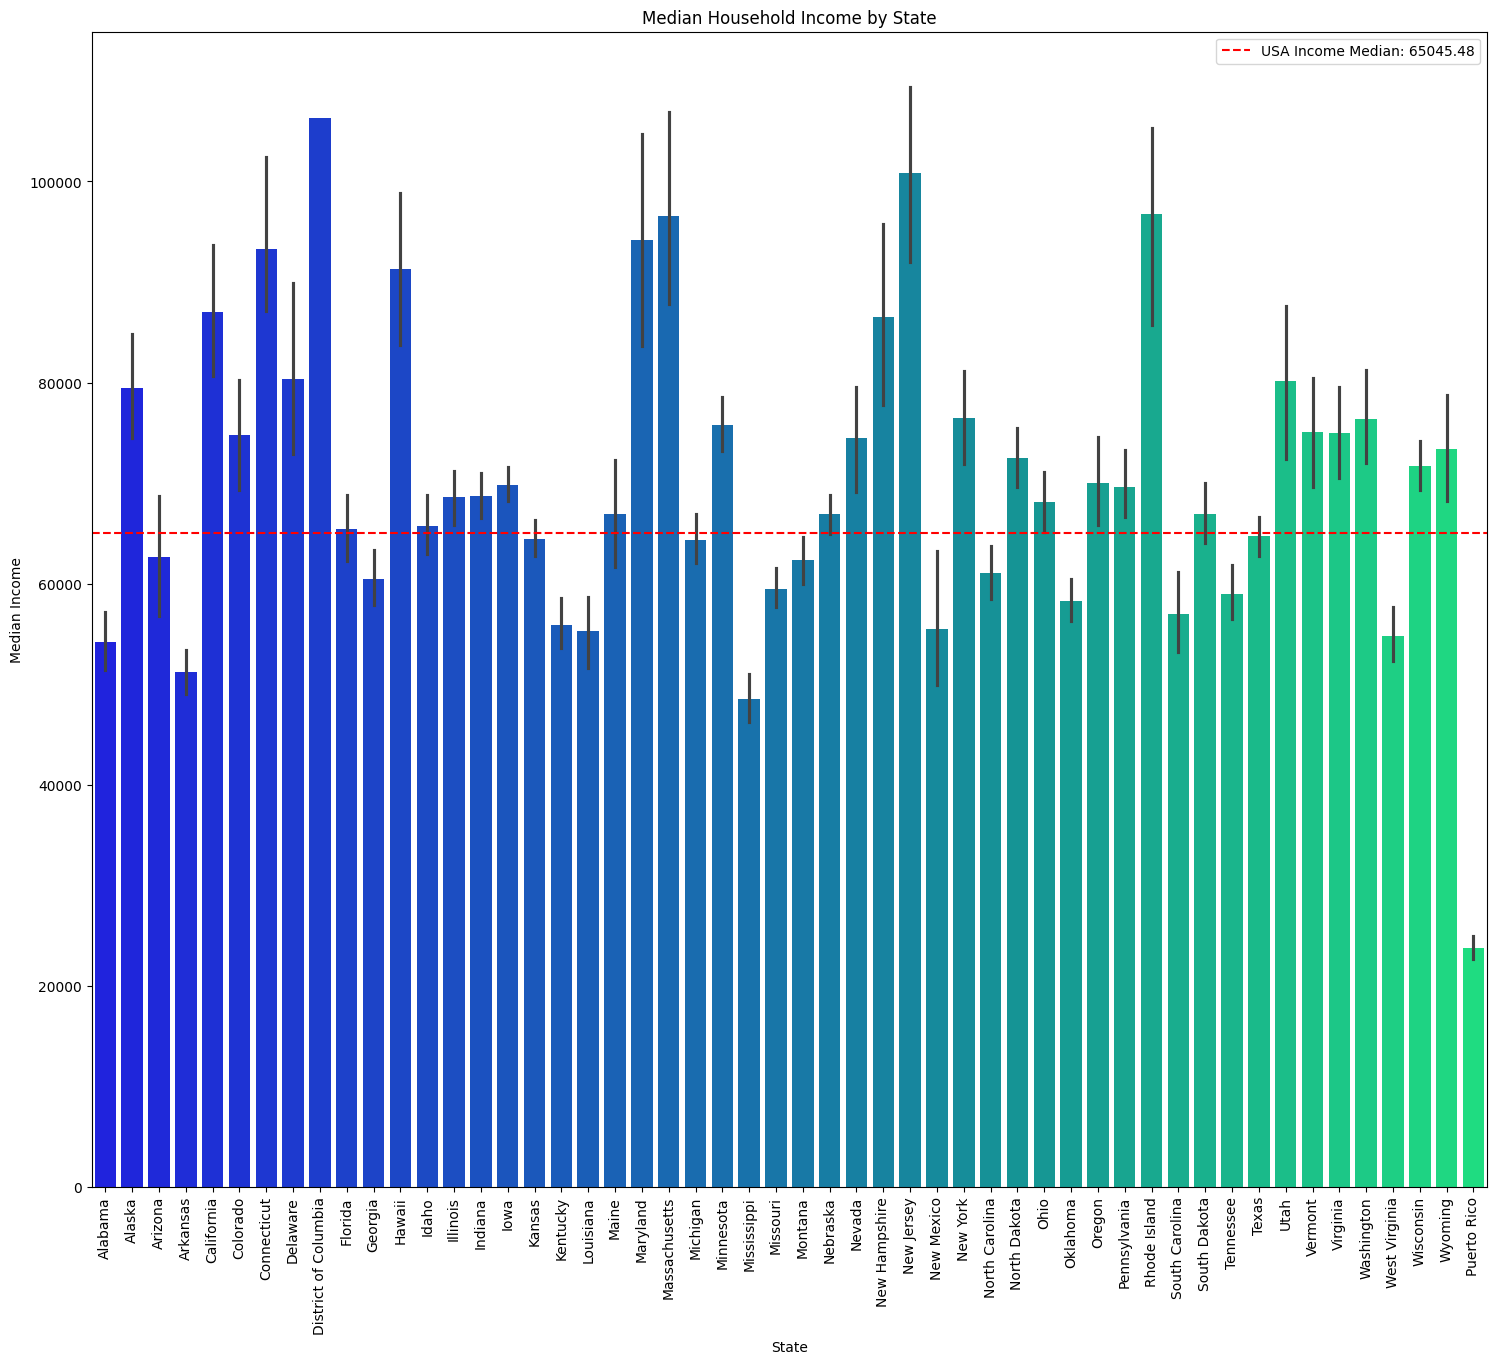

In [166]:
# @title Median Household Income by State
# Calcular la media global de "Median Household Income"
mean_income = df['Median Household Income'].mean()
plt.figure(figsize=(18, 15))

# Crear el gráfico de barras

sns.barplot(x='State', y='Median Household Income', data=df, palette='winter')

# Agregar la línea de la media global
plt.axhline(y=mean_income, color='red', linestyle='--', label=f'USA Income Median: {mean_income:.2f}')

# Configuración de etiquetas y título

plt.xlabel('State')
plt.ylabel('Median Income')
plt.title('Median Household Income by State')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario
plt.legend()

# Mostrar el gráfico
plt.show()


<ipython-input-151-16ad8e97664c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Median Household Income', data=df, palette='Set2')


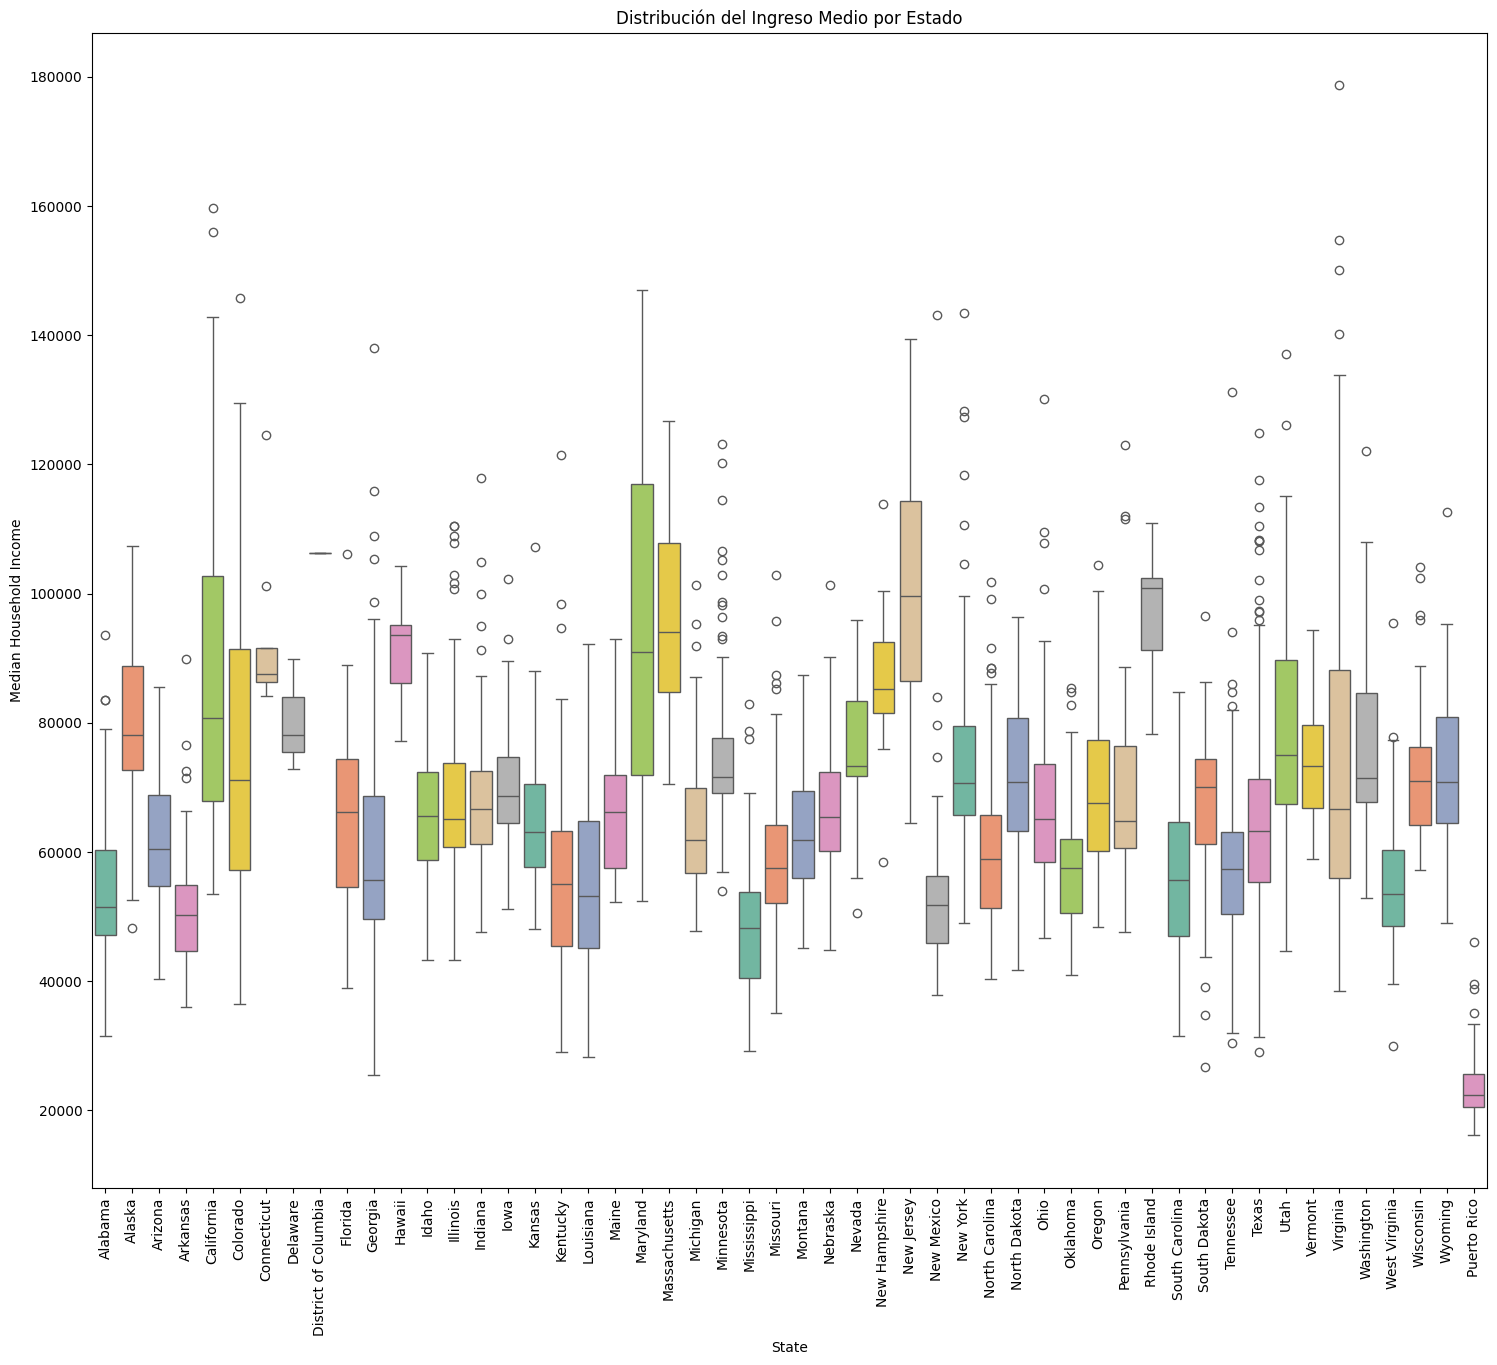

In [151]:
# @title Median Income Boxplot by State
plt.figure(figsize=(18, 15))
sns.boxplot(x='State', y='Median Household Income', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Median Income Boxplot by State')
plt.show()


<ipython-input-152-3060296e5788>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Median Household Income', y='Urban-Rural', inner='box', palette='Dark2')


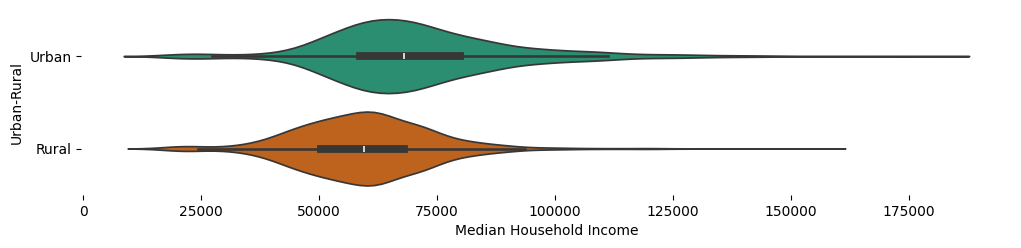

In [152]:
# @title Urban-Rural vs Median Household Income

figsize = (12, 1.2 * len(df['Urban-Rural'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Median Household Income', y='Urban-Rural', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [114]:
df2=df[['State','Median Household Income','Total Population','Urban-Rural']]
df2.head()

,State,Median Household Income,Total Population,Urban-Rural
0,Alabama,69841.0,59285.0,Urban
1,Alabama,75019.0,239945.0,Urban
2,Alabama,44290.0,24757.0,Rural
3,Alabama,51215.0,22152.0,Rural
4,Alabama,61096.0,59292.0,Urban
